In [13]:
#load modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [14]:
#load dataset
data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
#initialize the features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
) 

In [17]:
#model initialize for pridiction
model_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [18]:
y_pred = model_clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [19]:
# accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 1.0, 'Confusion Matrix Visualization')

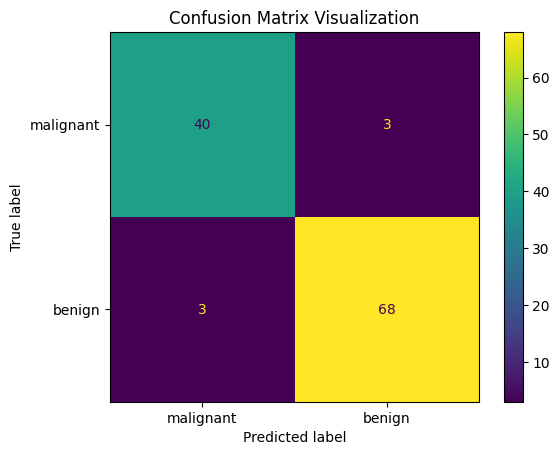

In [20]:
ConfusionMatrixDisplay.from_estimator(model_clf, X_test, y_test, display_labels=target_names)
plt.title("Confusion Matrix Visualization")

Text(0.5, 1.0, 'Decision Tree Model')

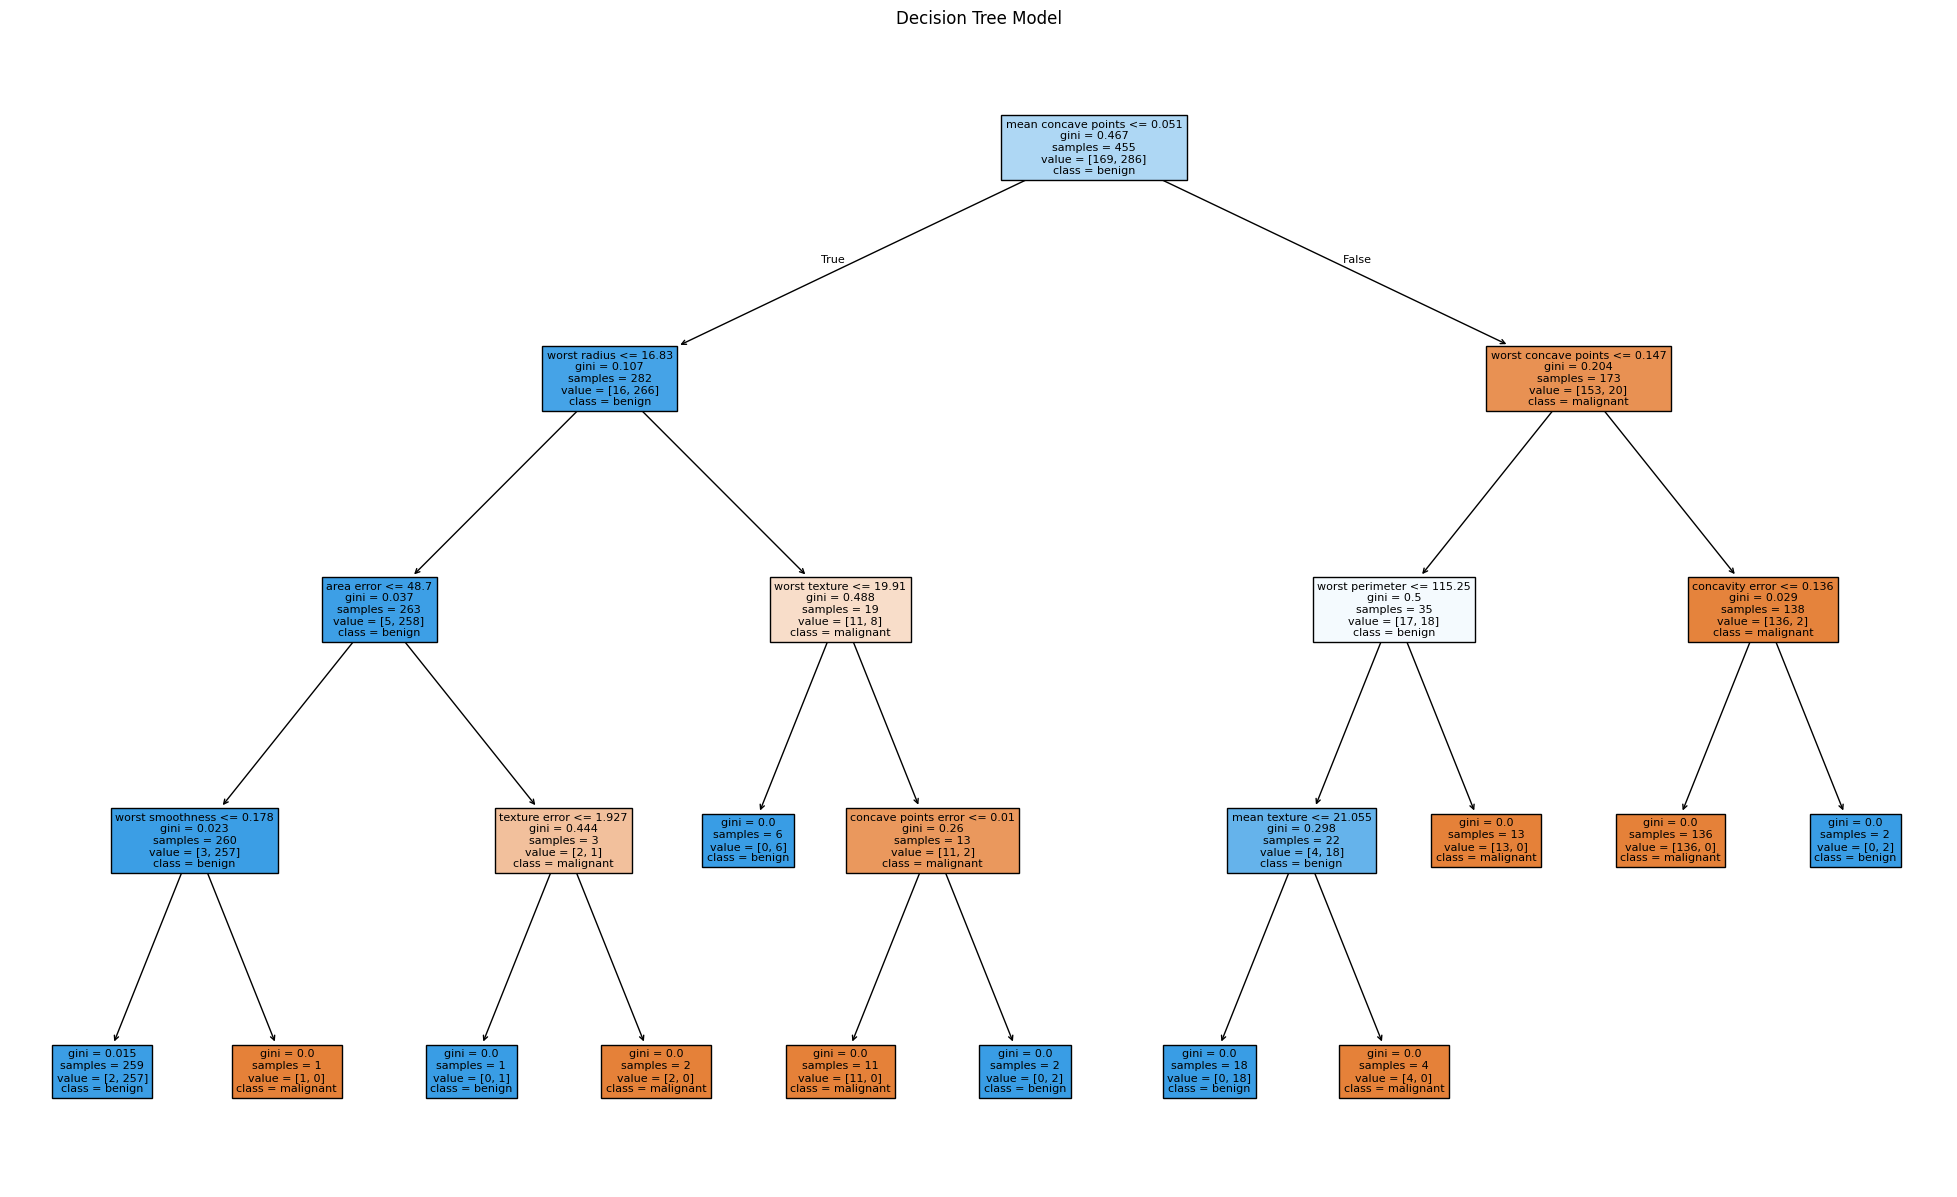

In [21]:
#visualization decision tree flow-chart
plt.figure(figsize=(25, 15))
tree.plot_tree(model_clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Model")

What You’re Looking At:

This output represents a Decision Tree used for classification (e.g., breast cancer diagnosis: malignant vs. benign). Each line (or group of lines) describes a node in the tree

Let's Break One Node Down
Here’s a sample node:

mean concave points <= 0.051
gini = 0.467
samples = 455
value = [169, 286]
class = benign

This is how to read it:

Feature split: mean concave points <= 0.051
→ If the value is less than or equal to 0.051, go left; otherwise, go right.

Gini index: gini = 0.467
→ A measure of impurity (0 means pure, 0.5 means very mixed). Lower is better.

Samples: samples = 455
→ This node contains 455 data points.

Value: value = [169, 286]
→ Out of those 455:

169 are malignant (class 1),

286 are benign (class 0).

Class: class = benign
→ This node predicts benign, since 286 > 169.


Tree Navigation
Every node splits into two child nodes: left (if the condition is True) and right (if False). Think of it like a flowchart:

Start at the root node.

Evaluate the feature condition.

Follow the arrow (left/right) depending on whether it’s true or false.

Repeat until you reach a leaf (no more splitting, final prediction).



Explanation of Parts in Your Output
Let's simplify a few nodes:

Root Node:
mean concave points <= 0.051
gini = 0.467
samples = 455
value = [169, 286]
class = benign

The root of the tree.

First decision is whether "mean concave points" ≤ 0.051.

Most samples are benign, so predicted class = benign.

Left Subtree (True branch):
worst radius <= 16.83
gini = 0.107
samples = 282
value = [16, 266]
class = benign

Left branch from root (i.e., condition was True).

Most samples still benign.

Very low gini: high confidence.

A Leaf:

gini = 0.0
samples = 1
value = [1, 0]
class = malignant

This is a leaf node.

Only 1 sample here.

It’s pure (100% malignant).

Right Subtree (False branch from root):
worst concave points <= 0.147
gini = 0.204
samples = 173
value = [153, 20]
class = malignant
More malignant samples here.

The model predicts malignant.

Deeper Branch:

concavity error <= 0.136
gini = 0.029
samples = 138
value = [136, 2]
class = malignant
Very pure node: 136 malignant, only 2 benign.

Very low gini = 0.029.

Prediction: malignant.

Summary
The output is a text-based representation of a decision tree.

Each node shows:

What feature it split on

How pure the node is (gini)

How many samples it contains

How many are in each class

What class it predicts



What's the Difference:
| Criterion   | Meaning                                                                   | Tends To                                                   |
| ----------- | ------------------------------------------------------------------------- | ---------------------------------------------------------- |
| `'gini'`    | Measures how often a randomly chosen element would be incorrectly labeled | Be slightly faster, favors larger partitions               |
| `'entropy'` | Based on Information Gain (from information theory)                       | Be more precise in some cases, especially for deeper trees |


When to Use 'entropy'
Use 'entropy' if:

You're interested in information gain from each split (common in theory or academic use).

You're comparing different tree splitting strategies.

You want to try both and choose the better-performing one through cross-validation or testing.